In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as mpl
import matplotlib.cm as cm
from drama import utils

# Multilooking 
The following cell inplements a simple function to _multilook_ an image using a _moving average_, i.e. a boxcar filter.

In [2]:
def moving_average(data, Naz, Nrg, downsample=False):
    """ A moving average filter for you
    Args:
        data: 2D numpy array
        Naz: number of samples averaged in azimuth (first dimension)
        Nrg: number of samples averaged in range (second dimension)
        downsample: True if you want to downsample after averaging
    """
    filt_data = utils.smooth(utils.smooth(data, Nrg, axis=1), Naz, axis=0)
    if downsample:
        filt_data = filt_data[int(Naz/2)::Naz, int(Nrg/2)::Nrg]
    return filt_data

# Chessboard with speckle
In the following cell we create speckle following a checkboard pattern.

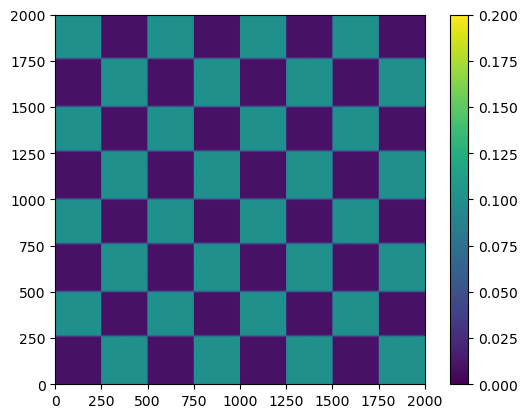

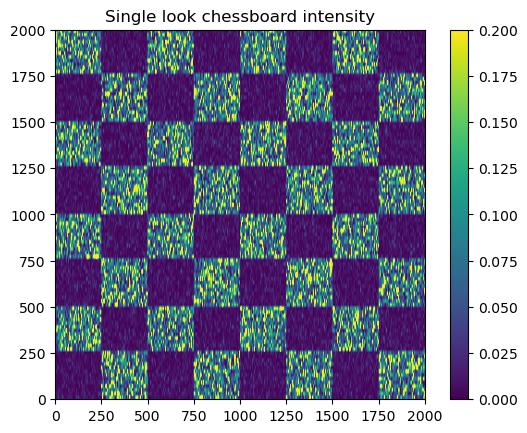

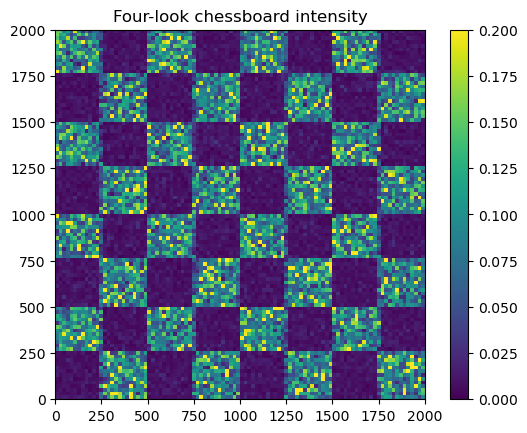

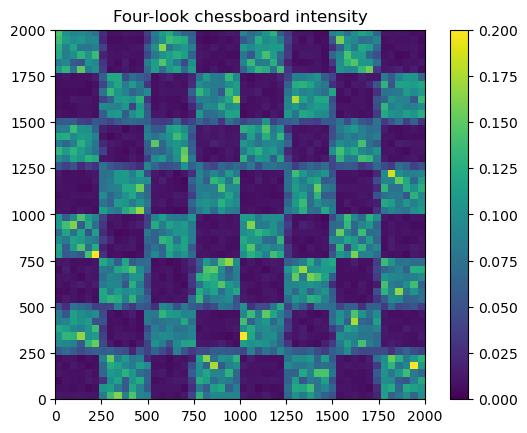

In [4]:
def chessboard_nrcs(shape, nrcs_black=0.01, nrcs_white=0.1, square_size=100, daz=20, dgr=5):
    """ Creates a chessboard pattern
    
    Args:
        shape: shape of output matrix
        nrcs_black (float):  nrcs for black squares. User decides if these are db or linear values.
        nrcs_white (float): nrcs for white squares...
        square_size (float): size of each square, in meters. Defaults to 100.
        daz (float): azimuth resolution (or in this case sampling). Defaults to 20 m.
        dgr (float): ground range resolution (sampling). Defaults to 5 m.
        
    """
    # This can be done in many ways, so do not put too much value in this particular implementation.
    aind = np.arange(shape[0]).reshape((shape[0], 1))
    rind = np.arange(shape[1]).reshape((1, shape[1]))
    apat = np.int32(aind*daz/square_size)
    rpat = np.int32(rind*dgr/square_size)
    chess_board = np.mod(apat + rpat, 2)
    chess_board = chess_board * (nrcs_white - nrcs_black) + nrcs_black
    return chess_board

# Let is try it, this shows the pattern without speckle
cbrd_nrcs = chessboard_nrcs((100, 400), 0.01, 0.1, square_size=250)
plt.figure()
plt.imshow(cbrd_nrcs, origin='lower', extent=(0,2000,0,2000), vmin=0, vmax=0.2)
plt.colorbar()
# Now to simulate an SAR image we need to multiply the random speckle by the deterministic pattern:
cbrd_slc  = np.sqrt(cbrd_nrcs/2) * (np.random.randn(100,400) + 1j*np.random.randn(100,400))
plt.figure()
plt.imshow(np.abs(cbrd_slc)**2, origin='lower', extent=(0,2000,0,2000), vmin=0, vmax=0.2)
plt.title("Single look chessboard intensity")
plt.colorbar()
# We can do some multilooking
cbrd_int_4looks = moving_average(np.abs(cbrd_slc)**2, 1, 4, downsample=True)
plt.figure()
plt.imshow(cbrd_int_4looks, origin='lower', extent=(0,2000,0,2000), vmin=0, vmax=0.2)
plt.title("Four-look chessboard intensity")
plt.colorbar()
cbrd_int_16looks = moving_average(np.abs(cbrd_slc)**2, 2, 8, downsample=True)
plt.figure()
plt.imshow(cbrd_int_16looks, origin='lower', extent=(0,2000,0,2000), vmin=0, vmax=0.2)
plt.title("Four-look chessboard intensity")
plt.colorbar()

In [5]:
import numpy as np

# Define the image size and resolution
shape = (50, 200)  # 50 rows (azimuth) x 200 columns (range)
square_size = 100  # Size of each square in meters
daz = 20  # Azimuth resolution
dgr = 5   # Range resolution

# Generate the chessboard NRCS pattern
nrcs = chessboard_nrcs(shape, nrcs_black=0.01, nrcs_white=0.1, 
                       square_size=square_size, daz=daz, dgr=dgr)

print(nrcs.shape)  # Confirm the shape is (50, 200)


(50, 200)


In [6]:
# Add complex Gaussian speckle noise
slc = np.sqrt(nrcs / 2) * (np.random.randn(*shape) + 1j * np.random.randn(*shape))

# Calculate the magnitude (intensity) of the speckle-corrupted image
intensity_image = np.abs(slc)


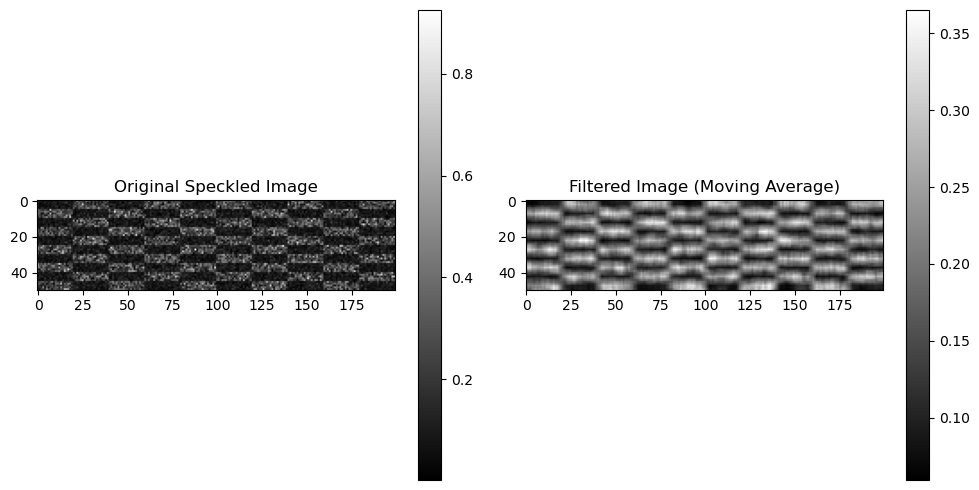

In [7]:
# Define smoothing parameters
Naz = 5  # Number of samples to average in azimuth
Nrg = 5  # Number of samples to average in range

# Apply the moving average filter
filtered_image = moving_average(intensity_image, Naz, Nrg)

# Compare the original and filtered images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Speckled Image")
plt.imshow(intensity_image, cmap='gray')
plt.colorbar()

# Filtered image
plt.subplot(1, 2, 2)
plt.title("Filtered Image (Moving Average)")
plt.imshow(filtered_image, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()
